In [22]:
%matplotlib inline


Simple visualization and classification of the digits dataset
=============================================================

Plot the first few samples of the digits dataset and a 2D representation
built using PCA, then do a simple classification



In [23]:
from sklearn.datasets import load_digits
digits = load_digits()

Plot the data: images of digits
-------------------------------

Each data in a 8x8 image



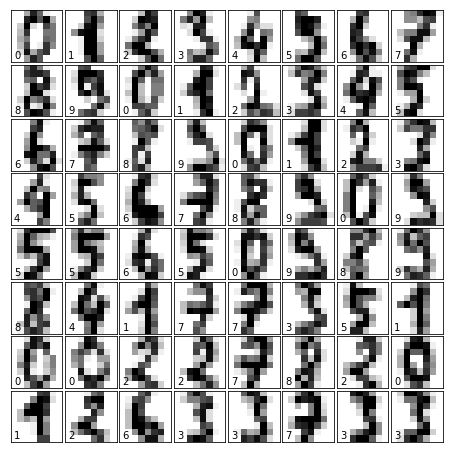

In [24]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))  # kich thuoc so = inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # gan nhan hinh anh voi gia tri dich
    ax.text(0, 7, str(digits.target[i]))

Plot a projection on the 2 first principal axis
------------------------------------------------



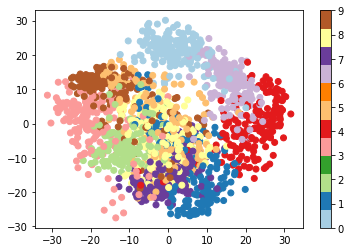

In [25]:
plt.figure()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

Classify with Gaussian naive Bayes
----------------------------------



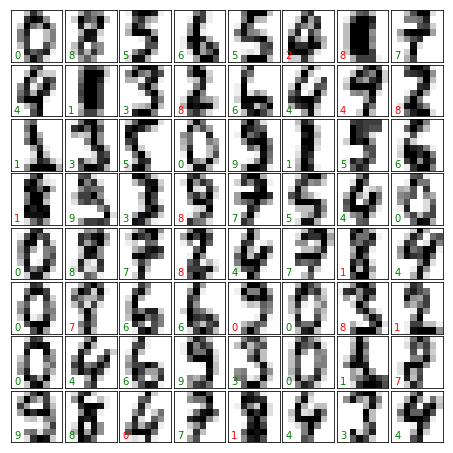

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# train the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

Quantify the performance
------------------------

First print the number of correct matches



In [27]:
matches = (predicted == expected)
print(matches.sum())

370


The total number of data points



In [28]:
print(len(matches))

450


And now, the ration of correct predictions



In [29]:
matches.sum() / float(len(matches))

0.8222222222222222

Print the classification report



In [30]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       0.96      0.96      0.96        46
          1       0.62      0.86      0.72        44
          2       0.94      0.62      0.75        50
          3       0.87      0.87      0.87        54
          4       0.95      0.87      0.91        46
          5       0.92      0.90      0.91        51
          6       0.97      0.97      0.97        39
          7       0.72      0.97      0.83        35
          8       0.54      0.64      0.58        44
          9       0.92      0.59      0.72        41

avg / total       0.85      0.82      0.82       450



Print the confusion matrix



In [31]:
print(metrics.confusion_matrix(expected, predicted))

plt.show()

[[44  0  0  0  1  1  0  0  0  0]
 [ 0 38  0  0  0  0  0  1  3  2]
 [ 0  6 31  2  0  0  0  0 11  0]
 [ 0  0  1 47  0  0  0  2  4  0]
 [ 1  1  1  0 40  0  0  2  1  0]
 [ 0  0  0  1  0 46  1  2  1  0]
 [ 0  0  0  0  0  1 38  0  0  0]
 [ 0  0  0  0  0  1  0 34  0  0]
 [ 0 13  0  0  0  0  0  3 28  0]
 [ 1  3  0  4  1  1  0  3  4 24]]
